In [1]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout #Dense means normal layers (no convolutional).
import matplotlib.pyplot as plt
import pandas as pd
from itertools import combinations
plt.rcParams['font.size'] = 14 #scale all the fonts in matplotlib to 14

%run nonlinear_function.py  #runs the non-linear function, we want to compare at the end the result of the DNN with the actual result

In [2]:
TYPE=1

#load the text from the files
x = np.loadtxt(filename("data", TYPE), delimiter = ' ')
y = np.loadtxt(filename("labels", TYPE), delimiter = ' ')

#Define the validation data, which will remain the same throughout. 

#The validation data and labels needs to be extracted from the generated data...
x_validation = x[0:800]
y_validation= y[0:800]

#...and ignored in the training set, so we remove the corresponding rows from the input data: 
x = np.delete(x, np.s_[0:800],axis=0)
y = np.delete(y, np.s_[0:800],axis=0)

#Check to see if everything is working properly
print('Lenght of traning data is: ', len(x))
print('Lenght of traning labels is: ', len(y))
print('Lenght of validation data is: ', len(x_validation))
print('Lenght of validation labels is: ', len(y_validation))

N = len(x)

# dim. of a sample
L = len(x[0])
print(N, L)

print('x1 min:', x[:,0].min(), 'x1 max:', x[:,0].max())
print('x2 min:', x[:,1].min(), 'x2 max:', x[:,1].max())


Lenght of traning data is:  3200
Lenght of traning labels is:  3200
Lenght of validation data is:  800
Lenght of validation labels is:  800
3200 2
x1 min: -49.837044318494996 x1 max: 49.95717914030824
x2 min: -49.94988774507294 x2 max: 49.99729118503266


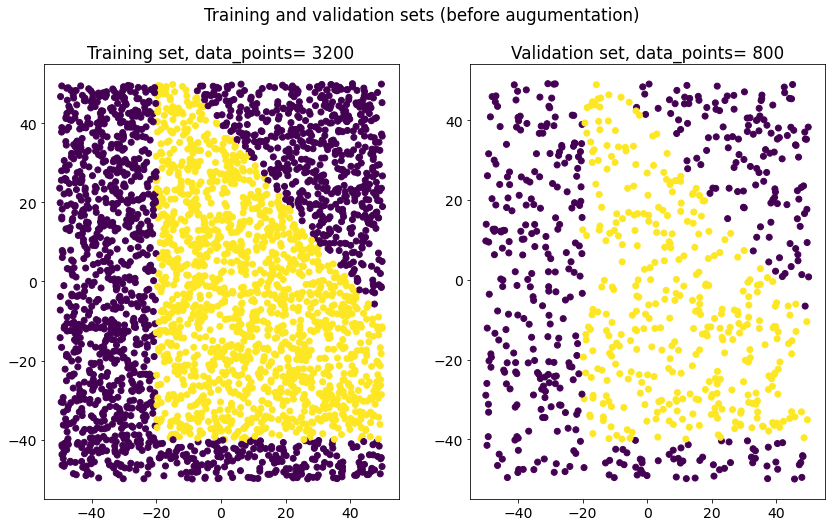

In [3]:
#Plot before doing anything
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (14,8))
fig.suptitle('Training and validation sets (before augumentation)')
ax1.scatter(x[:,0], x[:,1], c = y)
ax1.set_title('Training set, data_points= {}'.format(len(x)))
ax2.scatter(x_validation[:,0], x_validation[:,1], c = y_validation)
ax2.set_title('Validation set, data_points= {}'.format(len(x_validation)))
plt.show()

In [4]:
#The idea is we take a point and we calculate the distance to its closest neighbor.
#In order to make the calculation simpler we pick the point as the origin. 
#This distance (multiplied by sqrt(2)/2)) will give us the increment that it's possible
#to give to a point and not become another point.

d = []
for i in range(len(x)):
    d.append(np.sqrt(x[i,0]**2 + x[i,1]**2))

step = (min(d)*np.sqrt(2))/2
print(step)

0.5091854542227096


In [5]:
#Now we generate new data
#We define a function to augument the data.
#It takes as an arguement the original data, the labels remain unchanged but they need to be duplicated
#an appropriate number of times

print('This is old x:\n', x)

def augument(x,numcopies, y):
    first_new_y = np.append(y,y)
    first_new_x = x + (np.random.uniform(low = -step, high = step)) #had to do this because of first loop issues
    for i in range(1,numcopies):
        x_new = x + (np.random.uniform(low = -step, high = step))
        temp = np.append(first_new_x, x_new, axis = 0)
        y_new = np.append(first_new_y,y)
    return np.append(x,temp, axis = 0), y_new

print('This is the augumented dataset:\n', augument(x,2,y)[0])


x_aug = augument(x,2,y)[0]
y_aug = augument(x,2,y)[1]

This is old x:
 [[ 16.53029359 -45.93330207]
 [-43.76645582  21.50247857]
 [  9.30025806  -2.67387951]
 ...
 [-44.2083343  -40.72185801]
 [ 18.94733403 -16.00021831]
 [ 25.87812692  27.47150871]]
This is the augumented dataset:
 [[ 16.53029359 -45.93330207]
 [-43.76645582  21.50247857]
 [  9.30025806  -2.67387951]
 ...
 [-44.22576161 -40.73928532]
 [ 18.92990672 -16.01764562]
 [ 25.86069961  27.4540814 ]]


x1_aug min: -50.15956795461036 x1_aug max: 49.95717914030824
x2_aug min: -50.272411381188306 x2_aug max: 49.99729118503266
x1_aug_train min: -1.748953452647015 x1_aug_train max: 1.7426126392286088
x2_aug_train min: -1.743152157866704 x2_aug_train max: 1.7089285060173214


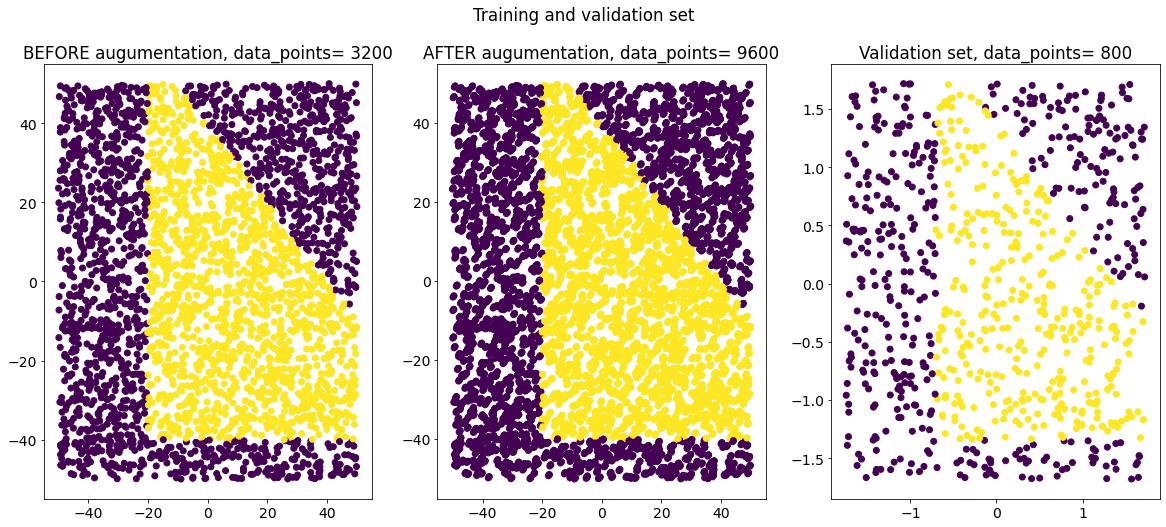

In [6]:
#Now we rescale the data, so that is has mean 0 and standard deviation 1
x_aug_train= np.copy(x_aug)

x_aug_train[:,0] = (x_aug[:,0]-x_aug[:,0].mean())/np.sqrt(x_aug[:,0].var())
x_aug_train[:,1] = (x_aug[:,1]-x_aug[:,1].mean())/np.sqrt(x_aug[:,1].var())


#And we also rescale the validation
x_validation[:,0] = (x_validation[:,0]-x_validation[:,0].mean())/np.sqrt(x_validation[:,0].var())
x_validation[:,1] = (x_validation[:,1]-x_validation[:,1].mean())/np.sqrt(x_validation[:,1].var())



print('x1_aug min:', x_aug[:,0].min(), 'x1_aug max:', x_aug[:,0].max())
print('x2_aug min:', x_aug[:,1].min(), 'x2_aug max:', x_aug[:,1].max())
print('x1_aug_train min:', x_aug_train[:,0].min(), 'x1_aug_train max:', x_aug_train[:,0].max())
print('x2_aug_train min:', x_aug_train[:,1].min(), 'x2_aug_train max:', x_aug_train[:,1].max())

#Now we need to plot the augumented data

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (20,8))
fig.suptitle('Training and validation set')
ax1.scatter(x[:,0], x[:,1], c = y)
ax1.set_title('BEFORE augumentation, data_points= {}'.format(len(x)))
ax2.scatter(x_aug[:,0], x_aug[:,1], c = y_aug)
ax2.set_title('AFTER augumentation, data_points= {}'.format(len(x_aug)))
ax3.scatter(x_validation[:,0], x_validation[:,1], c = y_validation)
ax3.set_title('Validation set, data_points= {}'.format(len(x_validation)))
plt.savefig('augumentation3x.png')

# This is the average distance between all points, what we actually want is closest neighbors.
# But by dividing the average distance by the number of points, assuming uniformly distributed points, 
# we get a small quantity that sort of represents the distance that any single point has to 
# its closest neighbors.

def dist(p1, p2):
    (x1, y1), (x2, y2) = p1, p2
    return np.sqrt((x2 - x1)**2 + (y2 - y1)**2)

points = list(zip(x[:,0], x[:,1]))

distances = [dist(p1, p2) for p1, p2 in combinations(points, 2)]

avg_distance_maybe = (sum(distances) / len(distances))/len(x)
print(avg_distance_maybe)

In [7]:
#Define model with keras

np.random.seed(12345)

CASE=1

if CASE==1: 
    model = Sequential()
    model.add(Dense(L, input_shape=(L,), activation = 'relu')) #input layer
    model.add(Dense(20, activation = 'relu')) #add first hidden layer
    model.add(Dense(20, activation = 'relu')) #add second hidden layer
    model.add(Dropout(0.2))  #probability of dropping a node (only valid for layer right above this line)
    model.add(Dense(1, activation = 'sigmoid')) #output layer
    nepoch = 400 #goes through the database 400 times. Keras by itself shuffles the data each epoch
    
if CASE==2: 
    model = Sequential()
    model.add(Dense(L, input_shape=(L,), activation = 'relu')) #input layer
    model.add(Dense(3, activation = 'relu')) #add first hidden layer
    model.add(Dense(1, activation = 'sigmoid')) #add second hidden layer
    nepoch = 400
    


In [8]:
#Define optimization method and cost function

model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [10]:
#Training step

fit = model.fit(x_aug_train, y_aug, epochs = nepoch, batch_size = 50,
                validation_data = (x_validation, y_validation), verbose = 2)



Epoch 1/400
192/192 - 1s - loss: 0.6416 - accuracy: 0.5852 - val_loss: 0.6050 - val_accuracy: 0.6787 - 627ms/epoch - 3ms/step
Epoch 2/400
192/192 - 0s - loss: 0.5821 - accuracy: 0.6837 - val_loss: 0.5226 - val_accuracy: 0.7312 - 271ms/epoch - 1ms/step
Epoch 3/400
192/192 - 0s - loss: 0.4621 - accuracy: 0.7749 - val_loss: 0.3569 - val_accuracy: 0.8550 - 252ms/epoch - 1ms/step
Epoch 4/400
192/192 - 0s - loss: 0.3476 - accuracy: 0.8447 - val_loss: 0.2930 - val_accuracy: 0.8800 - 212ms/epoch - 1ms/step
Epoch 5/400
192/192 - 0s - loss: 0.2992 - accuracy: 0.8656 - val_loss: 0.2698 - val_accuracy: 0.8775 - 244ms/epoch - 1ms/step
Epoch 6/400
192/192 - 0s - loss: 0.2730 - accuracy: 0.8770 - val_loss: 0.2525 - val_accuracy: 0.8900 - 212ms/epoch - 1ms/step
Epoch 7/400
192/192 - 0s - loss: 0.2463 - accuracy: 0.8891 - val_loss: 0.2427 - val_accuracy: 0.8888 - 214ms/epoch - 1ms/step
Epoch 8/400
192/192 - 0s - loss: 0.2299 - accuracy: 0.8952 - val_loss: 0.2327 - val_accuracy: 0.9000 - 208ms/epoch - 1

Epoch 66/400
192/192 - 0s - loss: 0.1582 - accuracy: 0.9256 - val_loss: 0.1886 - val_accuracy: 0.9125 - 222ms/epoch - 1ms/step
Epoch 67/400
192/192 - 0s - loss: 0.1579 - accuracy: 0.9259 - val_loss: 0.1829 - val_accuracy: 0.9175 - 206ms/epoch - 1ms/step
Epoch 68/400
192/192 - 0s - loss: 0.1585 - accuracy: 0.9270 - val_loss: 0.1783 - val_accuracy: 0.9187 - 215ms/epoch - 1ms/step
Epoch 69/400
192/192 - 0s - loss: 0.1578 - accuracy: 0.9260 - val_loss: 0.1874 - val_accuracy: 0.9125 - 210ms/epoch - 1ms/step
Epoch 70/400
192/192 - 0s - loss: 0.1572 - accuracy: 0.9259 - val_loss: 0.1724 - val_accuracy: 0.9212 - 215ms/epoch - 1ms/step
Epoch 71/400
192/192 - 0s - loss: 0.1563 - accuracy: 0.9258 - val_loss: 0.1774 - val_accuracy: 0.9175 - 222ms/epoch - 1ms/step
Epoch 72/400
192/192 - 0s - loss: 0.1581 - accuracy: 0.9258 - val_loss: 0.1761 - val_accuracy: 0.9175 - 212ms/epoch - 1ms/step
Epoch 73/400
192/192 - 0s - loss: 0.1574 - accuracy: 0.9260 - val_loss: 0.1750 - val_accuracy: 0.9162 - 218ms/e

Epoch 131/400
192/192 - 0s - loss: 0.1515 - accuracy: 0.9276 - val_loss: 0.1736 - val_accuracy: 0.9162 - 203ms/epoch - 1ms/step
Epoch 132/400
192/192 - 0s - loss: 0.1532 - accuracy: 0.9276 - val_loss: 0.1859 - val_accuracy: 0.9137 - 217ms/epoch - 1ms/step
Epoch 133/400
192/192 - 0s - loss: 0.1528 - accuracy: 0.9274 - val_loss: 0.1708 - val_accuracy: 0.9162 - 212ms/epoch - 1ms/step
Epoch 134/400
192/192 - 0s - loss: 0.1525 - accuracy: 0.9277 - val_loss: 0.1799 - val_accuracy: 0.9162 - 204ms/epoch - 1ms/step
Epoch 135/400
192/192 - 0s - loss: 0.1525 - accuracy: 0.9277 - val_loss: 0.1662 - val_accuracy: 0.9200 - 207ms/epoch - 1ms/step
Epoch 136/400
192/192 - 0s - loss: 0.1516 - accuracy: 0.9274 - val_loss: 0.1757 - val_accuracy: 0.9187 - 200ms/epoch - 1ms/step
Epoch 137/400
192/192 - 0s - loss: 0.1509 - accuracy: 0.9278 - val_loss: 0.1717 - val_accuracy: 0.9187 - 190ms/epoch - 991us/step
Epoch 138/400
192/192 - 0s - loss: 0.1512 - accuracy: 0.9272 - val_loss: 0.1697 - val_accuracy: 0.9175

Epoch 195/400
192/192 - 0s - loss: 0.1504 - accuracy: 0.9281 - val_loss: 0.1698 - val_accuracy: 0.9150 - 256ms/epoch - 1ms/step
Epoch 196/400
192/192 - 0s - loss: 0.1498 - accuracy: 0.9280 - val_loss: 0.1613 - val_accuracy: 0.9200 - 217ms/epoch - 1ms/step
Epoch 197/400
192/192 - 0s - loss: 0.1470 - accuracy: 0.9290 - val_loss: 0.1603 - val_accuracy: 0.9237 - 200ms/epoch - 1ms/step
Epoch 198/400
192/192 - 0s - loss: 0.1482 - accuracy: 0.9295 - val_loss: 0.1787 - val_accuracy: 0.9150 - 201ms/epoch - 1ms/step
Epoch 199/400
192/192 - 0s - loss: 0.1450 - accuracy: 0.9324 - val_loss: 0.1646 - val_accuracy: 0.9212 - 202ms/epoch - 1ms/step
Epoch 200/400
192/192 - 0s - loss: 0.1484 - accuracy: 0.9309 - val_loss: 0.1608 - val_accuracy: 0.9225 - 236ms/epoch - 1ms/step
Epoch 201/400
192/192 - 0s - loss: 0.1471 - accuracy: 0.9310 - val_loss: 0.1797 - val_accuracy: 0.9150 - 254ms/epoch - 1ms/step
Epoch 202/400
192/192 - 0s - loss: 0.1470 - accuracy: 0.9316 - val_loss: 0.1673 - val_accuracy: 0.9187 -

192/192 - 0s - loss: 0.1425 - accuracy: 0.9343 - val_loss: 0.1531 - val_accuracy: 0.9362 - 195ms/epoch - 1ms/step
Epoch 260/400
192/192 - 0s - loss: 0.1394 - accuracy: 0.9355 - val_loss: 0.1629 - val_accuracy: 0.9325 - 269ms/epoch - 1ms/step
Epoch 261/400
192/192 - 0s - loss: 0.1387 - accuracy: 0.9366 - val_loss: 0.1506 - val_accuracy: 0.9350 - 243ms/epoch - 1ms/step
Epoch 262/400
192/192 - 0s - loss: 0.1411 - accuracy: 0.9351 - val_loss: 0.1631 - val_accuracy: 0.9287 - 243ms/epoch - 1ms/step
Epoch 263/400
192/192 - 0s - loss: 0.1399 - accuracy: 0.9346 - val_loss: 0.1564 - val_accuracy: 0.9350 - 228ms/epoch - 1ms/step
Epoch 264/400
192/192 - 0s - loss: 0.1382 - accuracy: 0.9369 - val_loss: 0.1498 - val_accuracy: 0.9362 - 258ms/epoch - 1ms/step
Epoch 265/400
192/192 - 0s - loss: 0.1399 - accuracy: 0.9359 - val_loss: 0.1626 - val_accuracy: 0.9337 - 205ms/epoch - 1ms/step
Epoch 266/400
192/192 - 0s - loss: 0.1384 - accuracy: 0.9368 - val_loss: 0.1473 - val_accuracy: 0.9350 - 208ms/epoch -

192/192 - 0s - loss: 0.0979 - accuracy: 0.9590 - val_loss: 0.1015 - val_accuracy: 0.9588 - 210ms/epoch - 1ms/step
Epoch 324/400
192/192 - 0s - loss: 0.0911 - accuracy: 0.9621 - val_loss: 0.1211 - val_accuracy: 0.9513 - 199ms/epoch - 1ms/step
Epoch 325/400
192/192 - 0s - loss: 0.0927 - accuracy: 0.9602 - val_loss: 0.1003 - val_accuracy: 0.9600 - 199ms/epoch - 1ms/step
Epoch 326/400
192/192 - 0s - loss: 0.0934 - accuracy: 0.9613 - val_loss: 0.1042 - val_accuracy: 0.9550 - 206ms/epoch - 1ms/step
Epoch 327/400
192/192 - 0s - loss: 0.0907 - accuracy: 0.9621 - val_loss: 0.0993 - val_accuracy: 0.9575 - 215ms/epoch - 1ms/step
Epoch 328/400
192/192 - 0s - loss: 0.0893 - accuracy: 0.9632 - val_loss: 0.0999 - val_accuracy: 0.9600 - 215ms/epoch - 1ms/step
Epoch 329/400
192/192 - 0s - loss: 0.0907 - accuracy: 0.9605 - val_loss: 0.0942 - val_accuracy: 0.9638 - 210ms/epoch - 1ms/step
Epoch 330/400
192/192 - 0s - loss: 0.0881 - accuracy: 0.9633 - val_loss: 0.0913 - val_accuracy: 0.9638 - 212ms/epoch -

Epoch 388/400
192/192 - 0s - loss: 0.0441 - accuracy: 0.9817 - val_loss: 0.0591 - val_accuracy: 0.9700 - 203ms/epoch - 1ms/step
Epoch 389/400
192/192 - 0s - loss: 0.0402 - accuracy: 0.9839 - val_loss: 0.0377 - val_accuracy: 0.9837 - 264ms/epoch - 1ms/step
Epoch 390/400
192/192 - 0s - loss: 0.0430 - accuracy: 0.9827 - val_loss: 0.0642 - val_accuracy: 0.9787 - 256ms/epoch - 1ms/step
Epoch 391/400
192/192 - 0s - loss: 0.0391 - accuracy: 0.9845 - val_loss: 0.0489 - val_accuracy: 0.9775 - 239ms/epoch - 1ms/step
Epoch 392/400
192/192 - 0s - loss: 0.0404 - accuracy: 0.9828 - val_loss: 0.0545 - val_accuracy: 0.9775 - 228ms/epoch - 1ms/step
Epoch 393/400
192/192 - 0s - loss: 0.0372 - accuracy: 0.9856 - val_loss: 0.0593 - val_accuracy: 0.9775 - 219ms/epoch - 1ms/step
Epoch 394/400
192/192 - 0s - loss: 0.0381 - accuracy: 0.9847 - val_loss: 0.0471 - val_accuracy: 0.9775 - 208ms/epoch - 1ms/step
Epoch 395/400
192/192 - 0s - loss: 0.0354 - accuracy: 0.9855 - val_loss: 0.0341 - val_accuracy: 0.9862 -

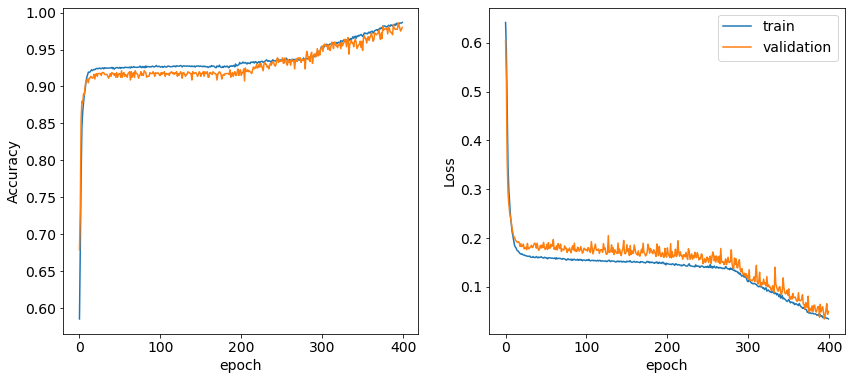

In [11]:
#Plot training and vaòlidation errors


fig,AX=plt.subplots(1,2,figsize=(14,6.))
ax=AX[0]
ax.plot(fit.history['accuracy'],label="train")
ax.plot(fit.history['val_accuracy'],label="validation")
ax.set_xlabel('epoch')
ax.set_ylabel("Accuracy")
ax=AX[1]
ax.plot(fit.history['loss'],label="train")
ax.plot(fit.history['val_loss'],label="validation")
ax.set_xlabel('epoch')
ax.set_ylabel("Loss")
ax.legend()
plt.savefig('augumented9600.png')

In [21]:
dX = 2
X1 = np.arange(-50,50+dX, dX)
LG = len(X1)
grid = np.zeros((LG*LG,2))
k=0
for i in range(LG):
    for j in range(LG):
        grid[k,:]=(X1[j],X1[i])
        k=k+1
print(X1)
print(len(X1),len(grid))
print(grid)

# RESCALE

grid_r = (grid/33.3)
print(grid_r)
pred = model.predict(grid_r)

[-50 -48 -46 -44 -42 -40 -38 -36 -34 -32 -30 -28 -26 -24 -22 -20 -18 -16
 -14 -12 -10  -8  -6  -4  -2   0   2   4   6   8  10  12  14  16  18  20
  22  24  26  28  30  32  34  36  38  40  42  44  46  48  50]
51 2601
[[-50. -50.]
 [-48. -50.]
 [-46. -50.]
 ...
 [ 46.  50.]
 [ 48.  50.]
 [ 50.  50.]]
[[-1.5015015  -1.5015015 ]
 [-1.44144144 -1.5015015 ]
 [-1.38138138 -1.5015015 ]
 ...
 [ 1.38138138  1.5015015 ]
 [ 1.44144144  1.5015015 ]
 [ 1.5015015   1.5015015 ]]


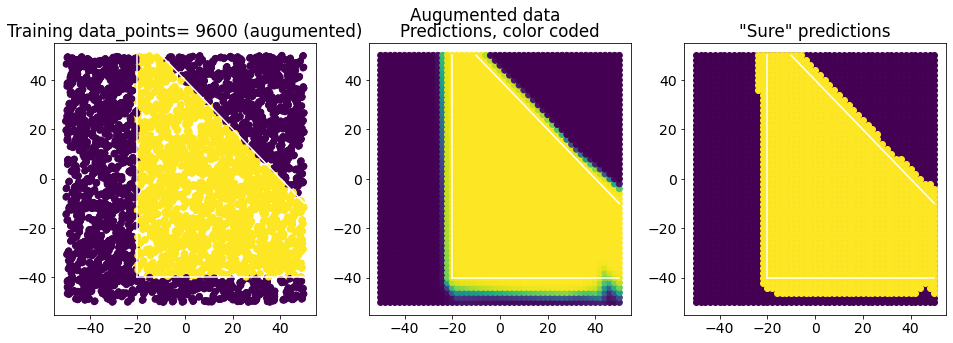

In [29]:
def boundaries():    
    ax.plot((-20,-20),(-40,50),c="w") #vertical line
    ax.plot((-20,50),(-40,-40),c="w") #horizontal line 
    ax.plot((-10,50),(50,-10),c="w")  #inclined line
fig,AX=plt.subplots(1,3,figsize=(16,5.))
fig.suptitle("Augumented data")
ax=AX[0]
ax.scatter(x_aug[:,0],x_aug[:,1],c=y_aug)
ax.set_title( 'Training data_points= {} (augumented)'.format(len(x_aug)))
boundaries()
ax=AX[1]
ax.scatter(grid[:,0],grid[:,1],c=pred)
ax.set_title('Predictions, color coded')
boundaries()
ax=AX[2]
W1=np.where(pred>0.5)[0] 
ax.scatter(grid[:,0],grid[:,1],c="#440154") #all points
ax.scatter(grid[W1,0],grid[W1,1],c="#fde725") #only points for which model is >0.5 sure of label
ax.set_title('\"Sure\" predictions')
boundaries()
plt.show()